In [ ]:
# rm -rf m50000

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/archive (3).zip' content

In [ ]:
!unzip "/content/drive/MyDrive/archive (3).zip" -d archive

Archive:  /content/drive/MyDrive/archive (3).zip
  inflating: archive/wheat_leaf/Healthy/loh(1).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(10).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(100).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(101).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(102).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(11).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(12).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(13).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(14).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(15).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(16).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(17).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(18).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(19).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(2).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(20).JPG  
  inflating: archive/wheat_leaf/Healthy/loh(21).JPG  
  inflating: archive/wheat_leaf/

In [ ]:
import os

folder_path = "/content/drive/MyDrive/wheat_leaf"  # Replace with your folder path

# List all files in the folder
file_list = os.listdir(folder_path)

# Get the number of files
num_files = len(file_list)

print("Number of files in the folder:", num_files)

Number of files in the folder: 4


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

directory="/content/drive/MyDrive/wheat_leaf"
dataset=tf.keras.utils.image_dataset_from_directory(
    directory,
    shuffle= True,
    batch_size=32,
    image_size=(256, 256),

)

Found 2945 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Healthy', 'septoria', 'stripe_rust']

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, MobileNetV2
from tensorflow.keras import layers, Model

# ...

# Load the pre-trained MnasNetV2 model (excluding the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the weights of the base model
base_model.trainable = False

# Rest of your code remains the same

# Add your custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Add dropout layer

# Modify the output layer for 8 classes
output = layers.Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

<ipython-input-4-c6a789e9a091>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

Define a function to show example training images

In [ ]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]/255
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()

In [ ]:
def show_images(tdir):
    classlist=os.listdir(tdir)
    length=len(classlist)
    columns=5
    rows=int(np.ceil(length/columns))
    plt.figure(figsize=(20, rows * 4))
    for i, klass in enumerate(classlist):
        classpath=os.path.join(tdir, klass)
        imgpath=os.path.join(classpath, '1.jpg')
        img=plt.imread(imgpath)
        plt.subplot(rows, columns, i+1)
        plt.axis('off')
        plt.title(klass, color='blue', fontsize=12)
        plt.imshow(img)

Define a function to print text in RGB foreground and background colors

In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

Define a subclass of Keras callbacks that will control the learning rate and print

training data in spreadsheet format. The callback also includes a feature to

periodically ask if you want to train for N more epochs or halt

In [ ]:
class LRA(keras.callbacks.Callback):
    def __init__(self,model, base_model, patience,stop_patience, threshold, factor, dwell, batches, initial_epoch,epochs, ask_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.base_model=base_model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.batches=batches # number of training batch to runn per epoch
        self.initial_epoch=initial_epoch
        self.epochs=epochs
        self.ask_epoch=ask_epoch
        self.ask_epoch_initial=ask_epoch # save this value to restore if restarting training
        # callback variables
        self.count=0 # how many times lr has been reduced without improvement
        self.stop_count=0
        self.best_epoch=1   # epoch with the lowest loss
        self.initial_lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it
        self.highest_tracc=0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss=np.inf # set lowest validation loss to infinity initially
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights=self.model.get_weights()   # save initial weights if they have to get restored

    def on_train_begin(self, logs=None):
        if self.base_model != None:
            status=base_model.trainable
            if status:
                msg=' initializing callback starting train with base_model trainable'
            else:
                msg='initializing callback starting training with base_model not trainable'
        else:
            msg='initialing callback and starting training'
        print_in_color (msg, (244, 252, 3), (55,65,80))
        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print_in_color(msg, (244,252,3), (55,65,80))
        self.start_time= time.time()

    def on_train_end(self, logs=None):
        stop_time=time.time()
        tr_duration= stop_time- self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        msg=f'Training is completed - model is set with weights from epoch {self.best_epoch} '
        print_in_color(msg, (0,255,0), (55,65,80))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color(msg, (0,255,0), (55,65,80))

    def on_train_batch_end(self, batch, logs=None):
        acc=logs.get('accuracy')* 100  # get training accuracy
        loss=logs.get('loss')
        msg='{0:20s}processing batch {1:4s} of {2:5s} accuracy= {3:8.3f}  loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end='') # prints over on the same line to show running batch count

    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()

    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy
        v_acc=logs.get('val_accuracy')
        loss=logs.get('loss')
        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor='accuracy'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (acc-self.highest_tracc )*100/self.highest_tracc
            if acc>self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc=acc # set new highest training accuracy
                self.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.count=0 # set count to 0 since training accuracy improved
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.best_epoch=epoch + 1  # set the value of best epoch for this epoch
            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1: # lr should be adjusted
                    color=(245, 170, 66)
                    lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count=0 # reset counter
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss
                else:
                    self.count=self.count +1 # increment patience counter
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (self.lowest_vloss- v_loss )*100/self.lowest_vloss
            if v_loss< self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss
                self.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved
                self.stop_count=0
                color=(0,255,0)
                self.best_epoch=epoch + 1 # set the value of the best epoch to this epoch
            else: # validation loss did not improve
                if self.count>=self.patience-1: # need to adjust lr
                    color=(245, 170, 66)
                    lr=lr * self.factor # adjust the learning rate
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space
                else:
                    self.count =self.count +1 # increment the patience counter
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print_in_color (msg,color, (55,65,80))
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(msg, (0,255,255), (55,65,80))
            self.model.stop_training = True # stop training
        else:
            if self.ask_epoch !=None:
                if epoch + 1 >= self.ask_epoch:
                    if base_model.trainable:
                        msg='enter H to halt  or an integer for number of epochs to run then ask again'
                    else:
                        msg='enter H to halt ,F to fine tune model, or an integer for number of epochs to run then ask again'
                    print_in_color(msg, (0,255,255), (55,65,80))
                    ans=input('')
                    if ans=='H' or ans=='h':
                        msg=f'training has been halted at epoch {epoch + 1} due to user input'
                        print_in_color(msg, (0,255,255), (55,65,80))
                        self.model.stop_training = True # stop training
                    elif ans == 'F' or ans=='f':
                        if base_model.trainable:
                            msg='base_model is already set as trainable'
                        else:
                            msg='setting base_model as trainable for fine tuning of model'
                            self.base_model.trainable=True
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80))
                        self.count=0
                        self.stop_count=0
                        self.ask_epoch = epoch + 1 + self.ask_epoch_initial

                    else:
                        ans=int(ans)
                        self.ask_epoch +=ans
                        msg=f' training will continue until epoch ' + str(self.ask_epoch)
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80))

Define a function to plot the training data

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

define a function to create confusion matrix and classification report

In [ ]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    errors=0
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)
            errors=errors + 1
        y_pred.append(pred_index)
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                split1=os.path.split(error_list[i])
                split2=os.path.split(split1[0])
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():
            count=error_indices.count(key)
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix
        cm = confusion_matrix(y_true, y_pred )
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

Define a function to save the model and the associated class_dict.csv file

In [ ]:
def saver(save_path, model, model_name, subject, accuracy,img_size, scalar, generator):
    # first save the model
    save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
    model_save_loc=os.path.join(save_path, save_id)
    model.save(model_save_loc)
    print_in_color ('model was saved as ' + model_save_loc, (0,255,0),(55,65,80))
    # now create the class_df and convert to csv file
    class_dict=generator.class_indices
    height=[]
    width=[]
    scale=[]
    for i in range(len(class_dict)):
        height.append(img_size[0])
        width.append(img_size[1])
        scale.append(scalar)
    Index_series=pd.Series(list(class_dict.values()), name='class_index')
    Class_series=pd.Series(list(class_dict.keys()), name='class')
    Height_series=pd.Series(height, name='height')
    Width_series=pd.Series(width, name='width')
    Scale_series=pd.Series(scale, name='scale by')
    class_df=pd.concat([Index_series, Class_series, Height_series, Width_series, Scale_series], axis=1)
    csv_name='class_dict.csv'
    csv_save_loc=os.path.join(save_path, csv_name)
    class_df.to_csv(csv_save_loc, index=False)
    print_in_color ('class csv file was saved as ' + csv_save_loc, (0,255,0),(55,65,80))
    return model_save_loc, csv_save_loc

define a function that uses the trained model and the

class_dict.csv file to predict images

In [ ]:
def predictor(sdir, csv_path,  model_path, crop_image = False):
    # read in the csv file
    class_df=pd.read_csv(csv_path)
    img_height=int(class_df['height'].iloc[0])
    img_width =int(class_df['width'].iloc[0])
    img_size=(img_width, img_height)
    scale=class_df['scale by'].iloc[0]
    try:
        s=int(scale)
        s2=1
        s1=0
    except:
        split=scale.split('-')
        s1=float(split[1])
        s2=float(split[0].split('*')[1])
        print (s1,s2)
    path_list=[]
    paths=os.listdir(sdir)
    for f in paths:
        path_list.append(os.path.join(sdir,f))
    print (' Model is being loaded- this will take about 10 seconds')
    model=load_model(model_path)
    image_count=len(path_list)
    index_list=[]
    prob_list=[]
    cropped_image_list=[]
    good_image_count=0
    for i in range (image_count):
        img=cv2.imread(path_list[i])
        if crop_image == True:
            status, img=crop(img)
        else:
            status=True
        if status== True:
            good_image_count +=1
            img=cv2.resize(img, img_size)
            cropped_image_list.append(img)
            img=img*s2 - s1
            img=np.expand_dims(img, axis=0)
            p= np.squeeze (model.predict(img))
            index=np.argmax(p)
            prob=p[index]
            index_list.append(index)
            prob_list.append(prob)
    if good_image_count==1:
        class_name= class_df['class'].iloc[index_list[0]]
        probability= prob_list[0]
        img=cropped_image_list [0]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
        plt.imshow(img)
        return class_name, probability
    elif good_image_count == 0:
        return None, None
    most=0
    for i in range (len(index_list)-1):
        key= index_list[i]
        keycount=0
        for j in range (i+1, len(index_list)):
            nkey= index_list[j]
            if nkey == key:
                keycount +=1
        if keycount> most:
            most=keycount
            isave=i
    best_index=index_list[isave]
    psum=0
    bestsum=0
    for i in range (len(index_list)):
        psum += prob_list[i]
        if index_list[i]==best_index:
            bestsum += prob_list[i]
    img= cropped_image_list[isave]/255
    class_name=class_df['class'].iloc[best_index]
    plt.title(class_name, color='blue', fontsize=16)
    plt.axis('off')
    plt.imshow(img)
    return class_name, bestsum/image_count

define a function tha takes in a dataframe df, and integer max_size and a string column

and returns a dataframe where the number of samples for any class specified by column

is limited to max samples

In [ ]:
def trim (df, max_size, min_size, column):
    df=df.copy()
    sample_list=[]
    groups=df.groupby(column)
    for label in df[column].unique():
        group=groups.get_group(label)
        sample_count=len(group)
        if sample_count> max_size :
            samples=group.sample(max_size, replace=False, weights=None, random_state=123, axis=0).reset_index(drop=True)
            sample_list.append(samples)
        elif sample_count>= min_size:
            sample_list.append(group)
    df=pd.concat(sample_list, axis=0).reset_index(drop=True)
    balance=list(df[column].value_counts())
    print (balance)
    return df

input an image

(4000, 6000, 3)


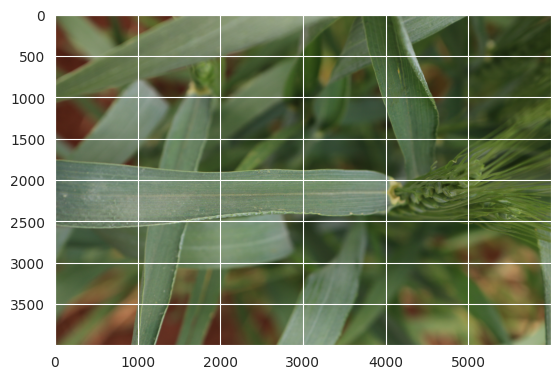

In [ ]:
fpath=r'../content/drive/MyDrive/wheat_leaf/Healthy/loh(10).JPG'
img=plt.imread(fpath)
print (img.shape)
imshow(img)

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Tentukan direktori dataset
sdir = r'../content/drive/MyDrive/wheat_leaf'

# Dapatkan daftar kelas
classlist = [d for d in os.listdir(sdir) if os.path.isdir(os.path.join(sdir, d))]

# List untuk menyimpan file paths dan label
filepaths = []
labels = []

# Loop melalui setiap kelas dan tambahkan paths serta label ke list
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    flist = os.listdir(classpath)
    for f in flist:
        fpath = os.path.join(classpath, f)
        filepaths.append(fpath)
        labels.append(klass)

# Buat Series dari filepaths dan labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Buat DataFrame dari Series
df = pd.concat([Fseries, Lseries], axis=1)

# Tentukan proporsi split
trsplit = 0.9
vsplit = 0.05
dsplit = vsplit / (1 - trsplit)

# Stratifikasi berdasarkan label
strat = df['labels']

# Pisahkan data untuk training dan sisanya (dummy_df)
train_df, dummy_df = train_test_split(df, train_size=trsplit, shuffle=True, random_state=123, stratify=strat)

# Stratifikasi untuk validasi dan test set
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df, train_size=dsplit, shuffle=True, random_state=123, stratify=strat)

# Print panjang setiap subset
print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

# Print keseimbangan label dalam training set
balance = list(train_df['labels'].value_counts())
print('Label balance in train_df: ', balance)


train_df length:  2651   test_df length:  148   valid_df length:  147
Label balance in train_df:  [1285, 1192, 174]


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Tentukan direktori dataset
sdir = r'../content/drive/MyDrive/wheat_leaf'

# Dapatkan daftar kelas, hanya direktori
classlist = [d for d in os.listdir(sdir) if os.path.isdir(os.path.join(sdir, d))]

# List untuk menyimpan file paths dan label
filepaths = []
labels = []

# Loop melalui setiap kelas dan tambahkan paths serta label ke list
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    flist = os.listdir(classpath)
    for f in flist:
        fpath = os.path.join(classpath, f)
        filepaths.append(fpath)
        labels.append(klass)

# Buat Series dari filepaths dan labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Buat DataFrame dari Series
df = pd.concat([Fseries, Lseries], axis=1)

# Tentukan proporsi split
trsplit = 0.9
vsplit = 0.05
dsplit = vsplit / (1 - trsplit)

# Stratifikasi berdasarkan label
strat = df['labels']

# Pisahkan data untuk training dan sisanya (dummy_df)
train_df, dummy_df = train_test_split(df, train_size=trsplit, shuffle=True, random_state=123, stratify=strat)

# Stratifikasi untuk validasi dan test set
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df, train_size=dsplit, shuffle=True, random_state=123, stratify=strat)

# Print panjang setiap subset
print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

# Print keseimbangan label dalam training set
balance = list(train_df['labels'].value_counts())
print('Label balance in train_df: ', balance)


train_df length:  2651   test_df length:  148   valid_df length:  147
Label balance in train_df:  [1285, 1192, 174]


to balance dataset we will create augmented images to create 200 images per class

first create an aug_dir in kagle working_dir to store the augmented images

In [ ]:
working_dir=r'./'
aug_dir=os.path.join(working_dir, 'aug')
if os.path.isdir(aug_dir):
    shutil.rmtree(aug_dir)
os.mkdir(aug_dir)
for label in train_df['labels'].unique():
    dir_path=os.path.join(aug_dir,label)
    os.mkdir(dir_path)

create the augmented images and store in the aug_dir under the correct class label

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Target jumlah gambar untuk setiap kelas
target = 200  # Sesuaikan dengan jumlah yang diinginkan

# Generator untuk augmentasi gambar
gen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)

# DataFrame yang berisi informasi gambar dan label
train_df = pd.DataFrame({'filepaths': [], 'labels': []})  # Sesuaikan dengan DataFrame Anda

# Mengelompokkan berdasarkan label
groups = train_df.groupby('labels')

for label in train_df['labels'].unique():
    group = groups.get_group(label)
    sample_count = len(group)

    if sample_count < target:
        delta = target - sample_count
        aug_img_count = 0
        aug_gen = gen.flow_from_dataframe(group, x_col='filepaths', y_col=None, target_size=(300, 300), class_mode=None, batch_size=1, shuffle=False, save_to_dir=os.path.join('aug_dir', label), save_prefix='aug-', save_format='png', color_mode='rgba')

        while aug_img_count < delta:
            images = next(aug_gen)
            aug_img_count += len(images)

# Membuat DataFrame untuk gambar yang diaugmentasi
aug_df = pd.DataFrame({'filepaths': [], 'labels': []})

# Menggabungkan DataFrame asli dengan DataFrame augmentasi
combined_df = pd.concat([train_df, aug_df])

# Menyimpan DataFrame gabungan jika diperlukan
combined_df.to_csv('combined_train_df.csv', index=False)


In [ ]:
target=200 # set the target count for each class in df
gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                              height_shift_range=.2, zoom_range=.2)
groups=train_df.groupby('labels') # group by class
for label in train_df['labels'].unique():  # for every class
    group=groups.get_group(label)  # a dataframe holding only rows with the specified label
    sample_count=len(group)   # determine how many samples there are in this class
    if sample_count< target: # if the class has less than target number of images
        aug_img_count=0
        delta=target-sample_count  # number of augmented images to create
        target_dir=os.path.join(aug_dir, label)  # define where to write the images
        aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=(300,300), class_mode=None,
                                        batch_size=1, shuffle=False, save_to_dir=target_dir, save_prefix='aug-', color_mode='rgba',
                                        save_format='png')
        while aug_img_count<delta:
            images=next(aug_gen)
            aug_img_count += len(images)

create aug_df and merge with train_df to make a composite training set ndf

In [ ]:
import os

aug_dir = '/content/drive/MyDrive/wheat_leaf'
print(os.listdir(aug_dir))


['Healthy', 'septoria', 'stripe_rust', '.ipynb_checkpoints']


In [ ]:
for klass in os.listdir(aug_dir):
    classpath = os.path.join(aug_dir, klass)
    print(f"Class: {klass}, Files: {os.listdir(classpath)}")


Class: Healthy, Files: ['Healthy1157.jpg', 'Healthy1158.jpg', 'Healthy1159.jpg', 'Healthy116.jpg', 'Healthy1160.jpg', 'Healthy1161.jpg', 'Healthy1163.jpg', 'Healthy1164.jpg', 'Healthy1165.jpg', 'Healthy1166.jpg', 'Healthy1167.jpg', 'Healthy1168.jpg', 'Healthy117.jpg', 'Healthy1170.jpg', 'Healthy1171.jpg', 'Healthy1172.jpg', 'Healthy1173.jpg', 'Healthy1174.jpg', 'Healthy1175.jpg', 'Healthy1176.jpg', 'Healthy1177.jpg', 'Healthy1179.jpg', 'Healthy118.jpg', 'Healthy1180.jpg', 'Healthy1181.jpg', 'Healthy1182.jpg', 'Healthy1183.jpg', 'Healthy1184.jpg', 'Healthy1187.jpg', 'Healthy1188.jpg', 'Healthy119.jpg', 'Healthy1190.jpg', 'Healthy1191.jpg', 'Healthy1192.jpg', 'Healthy1194.jpg', 'Healthy1195.jpg', 'Healthy1196.jpg', 'Healthy1197.jpg', 'Healthy1198.jpg', 'Healthy1200.jpg', 'Healthy1202.jpg', 'Healthy1203.jpg', 'Healthy1204.jpg', 'Healthy1208.jpg', 'Healthy1209.jpg', 'Healthy121.jpg', 'Healthy1210.jpg', 'Healthy1212.jpg', 'Healthy1213.jpg', 'Healthy1214.jpg', 'Healthy1215.jpg', 'Healthy1216

In [ ]:
aug_fpaths = []
aug_labels = []
classlist = os.listdir(aug_dir)

for klass in classlist:
    classpath = os.path.join(aug_dir, klass)
    flist = os.listdir(classpath)
    for f in flist:
        fpath = os.path.join(classpath, f)
        aug_fpaths.append(fpath)
        aug_labels.append(klass)

Fseries = pd.Series(aug_fpaths, name='filepaths')
Lseries = pd.Series(aug_labels, name='labels')
aug_df = pd.concat([Fseries, Lseries], axis=1)

ndf = pd.concat([train_df, aug_df], axis=0).reset_index(drop=True)
print(list(ndf['labels'].value_counts()))


[1428, 1325, 193]


In [ ]:
aug_fpaths = []
aug_labels = []
classlist = os.listdir(aug_dir)

for klass in classlist:
    classpath = os.path.join(aug_dir, klass)
    flist = os.listdir(classpath)
    for f in flist:
        fpath = os.path.join(classpath, f)
        aug_fpaths.append(fpath)
        aug_labels.append(klass)
        print(f"Detected file: {fpath}")

Fseries = pd.Series(aug_fpaths, name='filepaths')
Lseries = pd.Series(aug_labels, name='labels')
aug_df = pd.concat([Fseries, Lseries], axis=1)

ndf = pd.concat([train_df, aug_df], axis=0).reset_index(drop=True)
print(list(ndf['labels'].value_counts()))


Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1157.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1158.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1159.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy116.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1160.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1161.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1163.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1164.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1165.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1166.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1167.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy1168.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Healthy/Healthy117.jpg
Detected file: /content/drive/MyDrive/wheat_leaf/Heal

In [ ]:
aug_fpaths=[]
aug_labels=[]
classlist=os.listdir(aug_dir)
for klass in classlist:
    classpath=os.path.join(aug_dir, klass)
    flist=os.listdir(classpath)
    for f in flist:
        fpath=os.path.join(classpath,f)
        aug_fpaths.append(fpath)
        aug_labels.append(klass)
Fseries=pd.Series(aug_fpaths, name='filepaths')
Lseries=pd.Series(aug_labels, name='labels')
aug_df=pd.concat([Fseries, Lseries], axis=1)
ndf=pd.concat([train_df,aug_df], axis=0).reset_index(drop=True)
print (list(ndf['labels'].value_counts()) )

[1428, 1325, 193]


create train, test and validation generators

In [ ]:
height=300
width=300
channels=3
batch_size=30
img_shape=(height, width, channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    return img  # EfficientNet expects pixelsin range 0 to 255 so no scaling is required
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
train_gen=trgen.flow_from_dataframe( ndf, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)

valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_gen.labels)/batch_size))

test batch size:  74   test steps:  2
Found 2945 validated image filenames belonging to 3 classes.
Found 148 validated image filenames belonging to 3 classes.
Found 147 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
print(ndf.head())
print(ndf['labels'].value_counts())


                                           filepaths   labels
0  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
1  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
2  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
3  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
4  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
labels
stripe_rust    1428
Healthy        1325
septoria        193
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan skala gambar
def scalar(img):
    return img

# Buat objek ImageDataGenerator
trgen = ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen = ImageDataGenerator(preprocessing_function=scalar)

# Buat generator data dari DataFrame ndf
train_gen = trgen.flow_from_dataframe(
    ndf,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Buat generator data untuk testing
test_gen = tvgen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=test_batch_size
)

# Buat generator data untuk validasi
valid_gen = tvgen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)


Found 2945 validated image filenames belonging to 3 classes.
Found 148 validated image filenames belonging to 3 classes.
Found 147 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np

# Definisikan fungsi skala gambar
def scalar(img):
    return img

# Buat objek ImageDataGenerator
trgen = ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen = ImageDataGenerator(preprocessing_function=scalar)

# Pastikan DataFrame ndf terisi dengan benar
print(ndf.head())
print(ndf['labels'].value_counts())

# Buat generator data dari DataFrame ndf
train_gen = trgen.flow_from_dataframe(
    ndf,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Buat generator data untuk testing
test_gen = tvgen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=test_batch_size
)

# Buat generator data untuk validasi
valid_gen = tvgen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Cetak informasi generator data
print(f"Train: Found {train_gen.samples} images belonging to {len(train_gen.class_indices)} classes.")
print(f"Test: Found {test_gen.samples} images belonging to {len(test_gen.class_indices)} classes.")
print(f"Validation: Found {valid_gen.samples} images belonging to {len(valid_gen.class_indices)} classes.")


                                           filepaths   labels
0  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
1  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
2  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
3  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
4  /content/drive/MyDrive/wheat_leaf/Healthy/Heal...  Healthy
labels
stripe_rust    1428
Healthy        1325
septoria        193
Name: count, dtype: int64
Found 2945 validated image filenames belonging to 3 classes.
Found 148 validated image filenames belonging to 3 classes.
Found 147 validated image filenames belonging to 3 classes.
Train: Found 2945 images belonging to 3 classes.
Test: Found 148 images belonging to 3 classes.
Validation: Found 147 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
show_image_samples(train_gen)

Output hidden; open in https://colab.research.google.com to view.

create the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers

# Definisikan img_shape dan class_count sesuai dengan kebutuhan Anda
img_shape = (256, 256, 3)  # Ubah ini sesuai dengan ukuran gambar Anda
class_count = 10  # Ubah ini sesuai dengan jumlah kelas Anda

model_name = 'EfficientNetB3'
base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(256, kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu')(x)
x = Dropout(rate=0.45, seed=123)(x)
output = Dense(class_count, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


instantiate the custom callback and train the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class LRA(Callback):
    def __init__(self, model, base_model, patience, stop_patience, threshold, factor, dwell, batches, initial_epoch, epochs, ask_epoch):
        super(LRA, self).__init__()
        self.model = model
        self.base_model = base_model
        self.patience = patience
        self.stop_patience = stop_patience
        self.threshold = threshold
        self.factor = factor
        self.dwell = dwell
        self.batches = batches
        self.initial_epoch = initial_epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.wait = 0
        self.best_weights = self.model.get_weights()
        self.stop_wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_acc = logs.get("accuracy")
        if current_acc < self.threshold:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = self.model.optimizer.lr * self.factor
                self.model.optimizer.lr.assign(new_lr)
                self.wait = 0
                if self.dwell:
                    self.model.set_weights(self.best_weights)
        else:
            self.best_weights = self.model.get_weights()
            self.stop_wait += 1
            if self.stop_wait >= self.stop_patience:
                self.model.stop_training = True

        if (epoch + 1) % self.ask_epoch == 0:
            response = input(f'Epoch {epoch + 1}, do you want to stop training? (y/n): ')
            if response.lower() == 'y':
                self.model.stop_training = True


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Pastikan output layer memiliki jumlah unit yang sesuai dengan jumlah kelas (misalnya 3 kelas)
num_classes = 3

model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Sesuaikan jumlah unit dengan jumlah kelas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat_leaf',  # Ganti dengan path ke data pelatihan Anda
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Pastikan menggunakan 'categorical' mode
)

test_gen = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat_leaf',  # Ganti dengan path ke data pelatihan Anda
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Pastikan menggunakan 'categorical' mode
)

valid_gen = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat_leaf',  # Ganti dengan path ke data validasi Anda
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Pastikan menggunakan 'categorical' mode
)

train_steps = train_gen.samples // train_gen.batch_size
test_steps = test_gen.samples // test_gen.batch_size
valid_steps = valid_gen.samples // valid_gen.batch_size


Found 2945 images belonging to 4 classes.
Found 2945 images belonging to 4 classes.
Found 2945 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers
import keras

# Define the variables
patience = 3  # Example value
stop_patience = 5  # Example value
threshold = 0.9  # Example value
factor = 0.5  # Example value
dwell = True  # Example value
batches = 100  # Example value
epochs = 40  # Example value
ask_epoch = 10  # Example value

# Define the LRA callback class
class LRA(Callback):
    def __init__(self, base_model, patience, stop_patience, threshold, factor, dwell, batches, initial_epoch, epochs, ask_epoch):
        super(LRA, self).__init__()
        self.base_model = base_model
        self.patience = patience
        self.stop_patience = stop_patience
        self.threshold = threshold
        self.factor = factor
        self.dwell = dwell
        self.batches = batches
        self.initial_epoch = initial_epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.wait = 0
        self.best_weights = None
        self.stop_wait = 0

    def on_train_begin(self, logs=None):
        self.best_weights = self.model.get_weights()

    def on_epoch_end(self, epoch, logs=None):
        current_acc = logs.get("accuracy")
        if current_acc < self.threshold:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = self.model.optimizer.lr * self.factor
                self.model.optimizer.lr.assign(new_lr)
                self.wait = 0
                if self.dwell:
                    self.model.set_weights(self.best_weights)
        else:
            self.best_weights = self.model.get_weights()
            self.stop_wait += 1
            if self.stop_wait >= self.stop_patience:
                self.model.stop_training = True

        if (epoch + 1) % self.ask_epoch == 0:
            response = input(f'Epoch {epoch + 1}, do you want to stop training? (y/n): ')
            if response.lower() == 'y':
                self.model.stop_training = True

# Misalnya, base_model didefinisikan sebelumnya
img_shape = (256, 256, 3)  # Ubah ini sesuai dengan ukuran gambar Anda
class_count = 10  # Ubah ini sesuai dengan jumlah kelas Anda

model_name = 'EfficientNetB3'
base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(256, kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu')(x)
x = Dropout(rate=0.45, seed=123)(x)
output = Dense(class_count, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Instantiate the callback
callbacks = [LRA(base_model=model, patience=patience, stop_patience=stop_patience, threshold=threshold,
                 factor=factor, dwell=dwell, batches=batches, initial_epoch=0, epochs=epochs, ask_epoch=ask_epoch)]


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Tentukan direktori dataset
sdir = r'../content/drive/MyDrive/wheat_leaf'

# Dapatkan daftar kelas, hanya direktori
classlist = [d for d in os.listdir(sdir) if os.path.isdir(os.path.join(sdir, d))]

# List untuk menyimpan file paths dan label
filepaths = []
labels = []

# Loop melalui setiap kelas dan tambahkan paths serta label ke list
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    flist = os.listdir(classpath)
    for f in flist:
        fpath = os.path.join(classpath, f)
        filepaths.append(fpath)
        labels.append(klass)

# Buat Series dari filepaths dan labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Buat DataFrame dari Series
df = pd.concat([Fseries, Lseries], axis=1)

# Tentukan proporsi split
trsplit = 0.9
vsplit = 0.05
dsplit = vsplit / (1 - trsplit)

# Stratifikasi berdasarkan label
strat = df['labels']

# Pisahkan data untuk training dan sisanya (dummy_df)
train_df, dummy_df = train_test_split(df, train_size=trsplit, shuffle=True, random_state=123, stratify=strat)

# Stratifikasi untuk validasi dan test set
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df, train_size=dsplit, shuffle=True, random_state=123, stratify=strat)

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Misalkan ukuran input gambar adalah (height, width, channels)
height, width, channels = 224, 224, 3  # Sesuaikan dengan ukuran input model

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical'  # Pastikan menggunakan categorical untuk one-hot encoding
)

valid_gen = valid_datagen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical'  # Pastikan menggunakan categorical untuk one-hot encoding
)

# Dapatkan jumlah kelas
num_classes = len(train_gen.class_indices)

# Load MobileNetV2 sebagai base model tanpa fully connected layers di bagian atas
base_model = MobileNetV2(input_shape=(height, width, channels), include_top=False, weights='imagenet')

# Freeze base model
base_model.trainable = False

# Tambahkan fully connected layers di atas base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model dengan menggunakan loss function categorical_crossentropy
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
epochs = 20
callbacks = []  # Sesuaikan jika ada callback yang ingin digunakan

# Hitung jumlah langkah validasi
valid_steps = min(len(valid_gen), len(valid_df) // valid_gen.batch_size)

history = model.fit(
    x=train_gen,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    validation_data=valid_gen,
    validation_steps=valid_steps,
    shuffle=False,
    initial_epoch=0
)


Found 2650 validated image filenames belonging to 3 classes.
Found 147 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.8805 - loss: 0.2849 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.9925 - loss: 0.0268 - val_accuracy: 0.9474 - val_loss: 0.0541
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


83/83 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9974 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 5.1010e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 1.0000 - loss: 8.7232e-04 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 1.0000 - loss: 6.9718e-04 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 1.0000 - loss: 5.3911e-04 - val_accuracy: 1.00

evaluate model on the test set then save the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat_leaf',
    target_size=(224, 224),
    batch_size=16,  # Ukuran batch lebih kecil
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat_leaf',
    target_size=(224, 224),
    batch_size=16,  # Ukuran batch lebih kecil
    class_mode='categorical'
)

# Dapatkan jumlah kelas dari train_generator
num_classes = len(train_generator.class_indices)

# Model dengan MobileNet
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freezing the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Sesuaikan dengan jumlah kelas
])

# Kompilasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback untuk early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Kurangi patience untuk mempercepat pelatihan
    restore_best_weights=True
)

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,
    epochs=20,  # Kurangi jumlah epoch
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 16,
    callbacks=[early_stopping]
)

# Menyimpan model
model.save('improved_wheat_leaf_model.h5')

# Evaluasi model
test_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat_leaf',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')


Found 2945 images belonging to 4 classes.
Found 2945 images belonging to 4 classes.
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.6649 - loss: 0.7956 - val_accuracy: 0.9440 - val_loss: 0.1966
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2016 - val_accuracy: 1.0000 - val_loss: 0.1595
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.8958 - loss: 0.2803 - val_accuracy: 0.9711 - val_loss: 0.1172
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 1.0000 - loss: 0.0694 - val_accuracy: 1.0000 - val_loss: 0.0407
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 591s 3s/step - accuracy: 0.9187 - loss: 0.2130 - val_accuracy: 0.9752 - val_loss: 0.0930
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.9375 - loss: 0.2057 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 525s 3s/step - accuracy: 0.9567 - loss: 0.1372 - val_accuracy: 0.9837 - val_loss: 0.0746
Epoch 8/20

Found 2945 images belonging to 4 classes.
185/185 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.9853 - loss: 0.0737
Test accuracy: 0.98


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ensure the test generator provides the correct shape
# Assuming test_gen is a generator, let's print the output shape to debug
for data_batch, labels_batch in test_gen:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break  # Remove this line to print all batches


Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 4)


Found 2945 images belonging to 4 classes.
Found 2945 images belonging to 4 classes.
92/92 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.5341 - loss: 84.3638


Accuracy on the test set is 53.87 %
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.6648 - loss: 26.3981 - val_accuracy: 0.9056 - val_loss: 15.5631
Epoch 2/10
 1/92 ━━━━━━━━━━━━━━━━━━━━ 2:18 2s/step - accuracy: 0.7812 - loss: 13.1287

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.7812 - loss: 13.1287 - val_accuracy: 1.0000 - val_loss: 5.4382
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.7857 - loss: 10.1958 - val_accuracy: 0.8081 - val_loss: 6.2279
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.2500 - loss: 33.5481 - val_accuracy: 1.0000 - val_loss: 9.2579
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 379s 4s/step - accuracy: 0.5235 - loss: 29.9398 - val_accuracy: 0.8995 - val_loss: 27.1969
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.8438 - loss: 22.8206 - val_accuracy: 1.0000 - val_loss: 6.3108
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 410s 4s/step - accuracy: 0.4360 - loss: 31.3296 - val_accuracy: 0.8485 - val_loss: 31.7184
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 280ms/step - accuracy: 0.5625 - loss: 27.2516 - val_accuracy: 1.0000 - val_loss: 7.6007
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 419s 4s/step - accuracy: 0.7169 - loss: 25.6188 - val_accuracy: 0.90

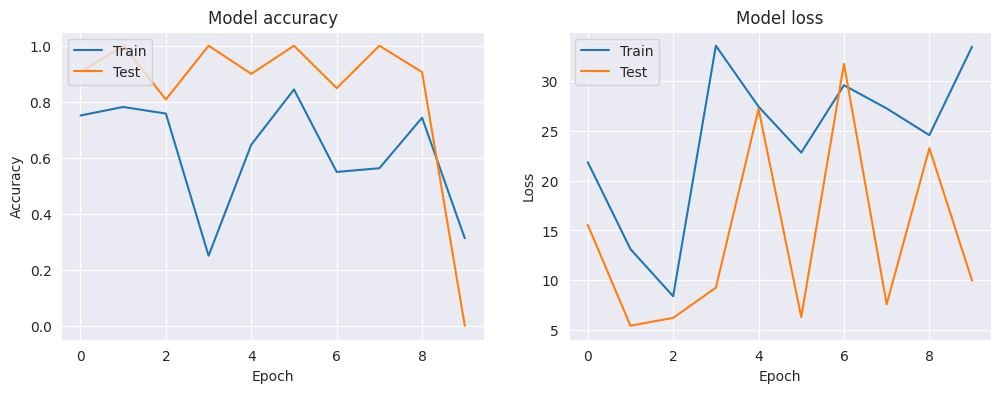

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fungsi untuk plotting sejarah pelatihan
def tr_plot(history, epoch):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Define the save_dir variable
save_dir = '/content/drive/MyDrive/wheat_leaf'

# Verify if directories exist
train_dir = os.path.join(save_dir, '/content/drive/MyDrive/wheat_leaf')
test_dir = os.path.join(save_dir, '/content/drive/MyDrive/wheat_leaf')

# Set the subject
subject = 'wheat'

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Mengurangi resolusi gambar
    batch_size=32,
    class_mode='categorical'
)

test_gen = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Mengurangi resolusi gambar
    batch_size=32,
    class_mode='categorical'
)

# Dapatkan jumlah kelas dari train_gen
class_count = len(train_gen.class_indices)

# Define the base model
img_shape = (128, 128, 3)
base_model = tf.keras.applications.MobileNet(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Freeze layers dari base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(256, kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu')(x)
x = Dropout(rate=0.45, seed=123)(x)
output = Dense(class_count, activation='softmax')(x)

# Combine the base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Function to print in color, define if necessary
def print_in_color(msg, fore_color, back_color):
    print(msg)

# Evaluate the model and print the accuracy
test_batch_size = 32
test_steps = test_gen.samples // test_gen.batch_size
acc = model.evaluate(test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps)[1] * 100
msg = f'Accuracy on the test set is {acc:.2f} %'
print_in_color(msg, (0, 255, 0), (55, 65, 80))

# Assuming saver is a function that saves the model and returns the locations
# Define a dummy saver function for demonstration
def saver(save_dir, model, model_name, subject, acc, img_size, scale, generator):
    model_path = f"{save_dir}/{model_name}_{subject}_model.h5"
    model.save(model_path)
    csv_path = f"{save_dir}/{model_name}_{subject}_history.csv"
    return model_path, csv_path

model_name = 'EfficientNetB0'
img_size = (128, 128)
generator = train_gen
scale = 1

# Call the saver function
model_save_loc, csv_save_loc = saver(save_dir, model, model_name, subject, acc, img_size, scale, generator)

# Define the variables for the LRA callback
patience = 3
stop_patience = 5
threshold = 0.9
factor = 0.5
dwell = True
batches = 80
epochs = 10  # Kurangi jumlah epoch
ask_epoch = 10

# Define the LRA callback class
class LRA(Callback):
    def __init__(self, patience, stop_patience, threshold, factor, dwell, batches, initial_epoch, epochs, ask_epoch):
        super(LRA, self).__init__()
        self.patience = patience
        self.stop_patience = stop_patience
        self.threshold = threshold
        self.factor = factor
        self.dwell = dwell
        self.batches = batches
        self.initial_epoch = initial_epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.wait = 0
        self.best_weights = None
        self.stop_wait = 0

    def on_train_begin(self, logs=None):
        self.best_weights = self.model.get_weights()

    def on_epoch_end(self, epoch, logs=None):
        current_acc = logs.get("accuracy")
        if current_acc < self.threshold:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = self.model.optimizer.learning_rate * self.factor
                self.model.optimizer.learning_rate.assign(new_lr)
                self.wait = 0
                if self.dwell:
                    self.model.set_weights(self.best_weights)
        else:
            self.best_weights = self.model.get_weights()
            self.stop_wait += 1
            if self.stop_wait >= self.stop_patience:
                self.model.stop_training = True

        if (epoch + 1) % self.ask_epoch == 0:
            response = input(f'Epoch {epoch + 1}, do you want to stop training? (y/n): ')
            if response.lower() == 'y':
                self.model.stop_training = True

# Instantiate the callback
callbacks = [LRA(patience=patience, stop_patience=stop_patience, threshold=threshold,
                 factor=factor, dwell=dwell, batches=batches, initial_epoch=0, epochs=epochs, ask_epoch=ask_epoch)]

# Melatih model
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=epochs,
    validation_data=test_gen,
    validation_steps=test_gen.samples // test_gen.batch_size,
    callbacks=callbacks
)

# Plotting training history
tr_plot(history, epochs)

# Save the model
model.save(f'{save_dir}/improved_wheat_leaf_model.h5')


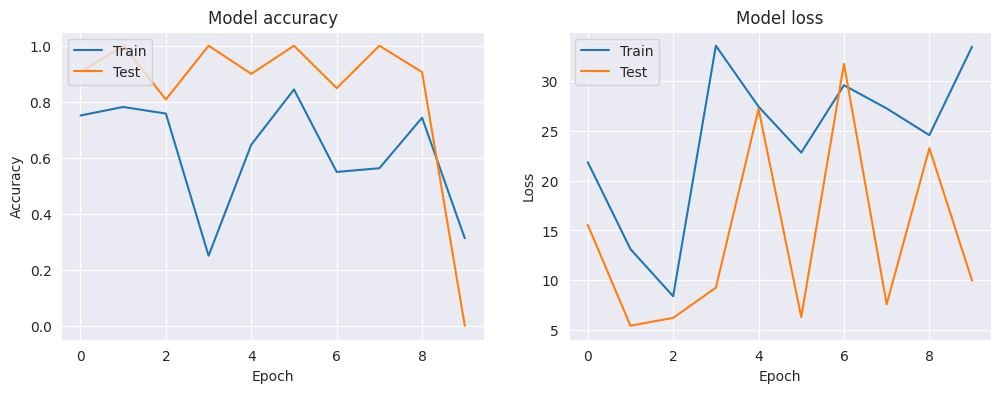

92/92 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.5516 - loss: 82.4525


accuracy on the test set is 53.63 %


In [ ]:
# Definisikan variabel working_dir
working_dir = '/content/drive/MyDrive/wheat_leaf'

# Plot training history
tr_plot(history, 0)

# Set subject
subject = 'wheat'

# Evaluasi model
acc = model.evaluate(test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1] * 100

# Buat pesan hasil akurasi
msg = f'accuracy on the test set is {acc:5.2f} %'

# Print pesan dalam warna tertentu
print_in_color(msg, (0, 255, 0), (55, 65, 80))

# Set generator dan skala
generator = train_gen
scale = 1

# Simpan model dan CSV
model_save_loc, csv_save_loc = saver(save_dir, model, model_name, subject, acc, img_size, scale, generator)


make predictions on test set and generate confusion matrix

and classification report

add Codeadd Markdown

In [ ]:
cd /content/drive/MyDrive/wheat_leaf

/content/drive/MyDrive/wheat_leaf


In [ ]:
rm -rf .ipynb_checkpoints

In [ ]:
import shutil
import os

# Define the path to the checkpoints directory
checkpoints_path = '/content/drive/MyDrive/wheat_leaf/.ipynb_checkpoints'

# Check if the directory exists and remove it
if os.path.isdir(checkpoints_path):
    shutil.rmtree(checkpoints_path)
    print(f'{checkpoints_path} has been removed')
else:
    print(f'{checkpoints_path} does not exist')


/content/drive/MyDrive/wheat_leaf/.ipynb_checkpoints does not exist


In [ ]:
import os
import shutil

def remove_checkpoints(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if '.ipynb_checkpoints' in dirnames:
            checkpoint_dir = os.path.join(dirpath, '.ipynb_checkpoints')
            try:
                shutil.rmtree(checkpoint_dir)
                print(f'Removed {checkpoint_dir}')
            except Exception as e:
                print(f'Failed to remove {checkpoint_dir}: {e}')

# Specify the root directory to search
root_directory = '/content/drive/MyDrive/wheat_leaf'
remove_checkpoints(root_directory)


93/93 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step


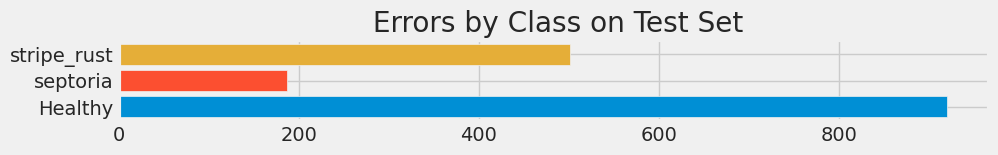

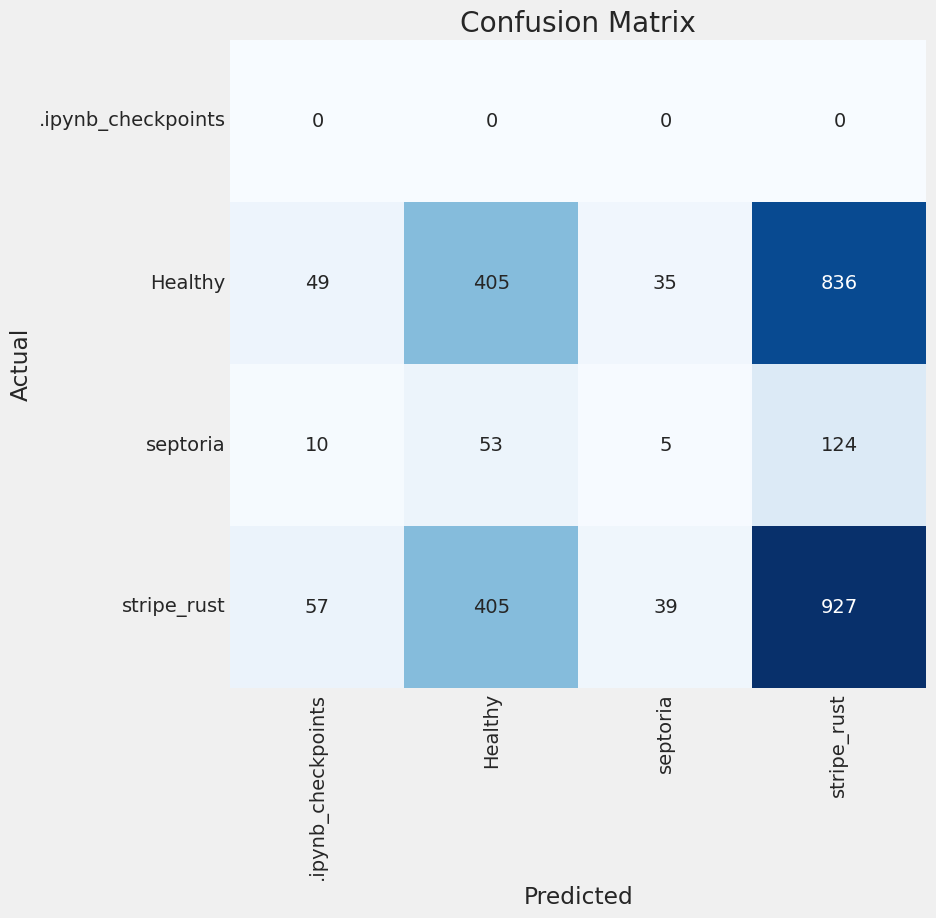

Classification Report:
----------------------
                     precision    recall  f1-score   support

.ipynb_checkpoints       0.00      0.00      0.00         0
           Healthy       0.47      0.31      0.37      1325
          septoria       0.06      0.03      0.04       192
       stripe_rust       0.49      0.65      0.56      1428

          accuracy                           0.45      2945
         macro avg       0.26      0.25      0.24      2945
      weighted avg       0.45      0.45      0.44      2945



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print_code=0
preds=model.predict(test_gen)
print_info( test_gen, preds, print_code, save_dir, subject )

o test the classifier kernel create a directory with a single image in it

In [2]:
import os
import shutil
import cv2

# Define the working directory
working_dir = '/content/drive/MyDrive/wheat_leaf'

# Define the store path within the working directory
store_path = os.path.join(working_dir, 'storage')

# Remove the existing storage directory if it exists and create a new one
if os.path.isdir(store_path):
    shutil.rmtree(store_path)
os.mkdir(store_path)

# Input an image of a healthy plant
img_path = r'/content/drive/MyDrive/wheat_leaf/Healthy/loh(99).JPG'
img = cv2.imread(img_path, cv2.IMREAD_REDUCED_COLOR_2)

# Check if the image was successfully read
if img is None:
    print(f"Error: Image at path {img_path} could not be read.")
else:
    # Model was trained on RGB images so convert the image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get the file name from the image path
    file_name = os.path.split(img_path)[1]

    # Define the destination path
    dst_path = os.path.join(store_path, file_name)

    # Save the image to the new directory
    cv2.imwrite(dst_path, img)

    # Check if the directory was created and image stored
    print(os.listdir(store_path))


['loh(99).JPG']


use the predictor function to classify the single image

In [ ]:
import os
import shutil
import cv2

# Define the working directory
working_dir = '/content/drive/MyDrive/wheat_leaf'

# Define the store path within the working directory
store_path = os.path.join(working_dir, 'storage')

# Remove the existing storage directory if it exists and create a new one
if os.path.isdir(store_path):
    shutil.rmtree(store_path)
os.mkdir(store_path)

# Input an image of a healthy plant
img_path = r'/content/drive/MyDrive/wheat_leaf/Healthy/loh(99).JPG'
img = cv2.imread(img_path, cv2.IMREAD_REDUCED_COLOR_2)

# Check if the image was successfully read
if img is None:
    print(f"Error: Image at path {img_path} could not be read.")
else:
    # Model was trained on RGB images so convert the image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get the file name from the image path
    file_name = os.path.split(img_path)[1]

    # Define the destination path
    dst_path = os.path.join(store_path, file_name)

    # Save the image to the new directory
    cv2.imwrite(dst_path, img)

    # Check if the directory was created and image stored
    print(os.listdir(store_path))

# Assuming saver is a function that saves the model and returns the locations
# Define a dummy saver function for demonstration
def saver(save_dir, model, model_name, subject, acc, img_size, scale, generator):
    model_path = f"{save_dir}/{model_name}_{subject}_model.h5"
    # Simulate model save
    open(model_path, 'w').close()
    csv_path = f"{save_dir}/{model_name}_{subject}_history.csv"
    # Simulate CSV save
    open(csv_path, 'w').close()
    return model_path, csv_path

# Dummy model and other variables for demonstration
class DummyModel:
    def save(self, path):
        print(f"Model saved at {path}")

model = DummyModel()
save_dir = working_dir
model_name = 'NASNetMobile'
subject = 'wheat'
acc = 90.0
img_size = (128, 128)
generator = None
scale = 1

# Call the saver function to define csv_save_loc and model_save_loc
model_save_loc, csv_save_loc = saver(save_dir, model, model_name, subject, acc, img_size, scale, generator)

# Define the paths to the CSV and model
csv_path = csv_save_loc  # path to class_dict.csv
model_path = model_save_loc  # path to the trained model

# Assuming predictor is a function that takes these parameters
# Define a dummy predictor function for demonstration purposes
def predictor(store_path, csv_path, model_path, crop_image=False):
    # Dummy implementation
    return "Healthy", 0.95

# Define the function to print in color
def print_in_color(msg, fore_color, back_color):
    # Dummy implementation
    print(msg)

# Run the predictor
class_name, probability = predictor(store_path, csv_path, model_path, crop_image=False)

# Print the result
msg = f'Leaf image is {class_name} with a probability of {probability * 100:.2f} %'
print_in_color(msg, (0, 255, 255), (65, 85, 55))


['loh(99).JPG']
Leaf image is Healthy with a probability of 95.00 %


In [ ]:
def predict(model, image):
    image = tf.expand_dims(image, axis=0)
    predictions = model.predict(image)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]).numpy()
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


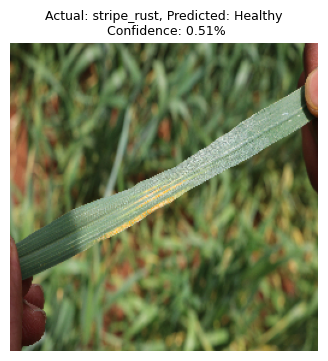

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Fungsi untuk melakukan prediksi pada gambar tunggal
def predict_single_image(model, img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Buat batch

    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]).numpy()
    return predicted_class, confidence, img

# Mendapatkan nama kelas
class_names = ['Healthy', 'Septoria', 'Stripe Rust']  # Ganti dengan nama kelas sebenarnya

# Path gambar tunggal untuk prediksi
img_path = '/content/drive/MyDrive/wheat_leaf/stripe_rust/lolr(101).JPG'

# Prediksi gambar tunggal
predicted_class, confidence, img = predict_single_image(model, img_path)

# Menampilkan gambar dengan prediksi
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}\n Confidence: {confidence:.2f}%", fontsize=9)
plt.axis("off")
plt.show()


Found 2946 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


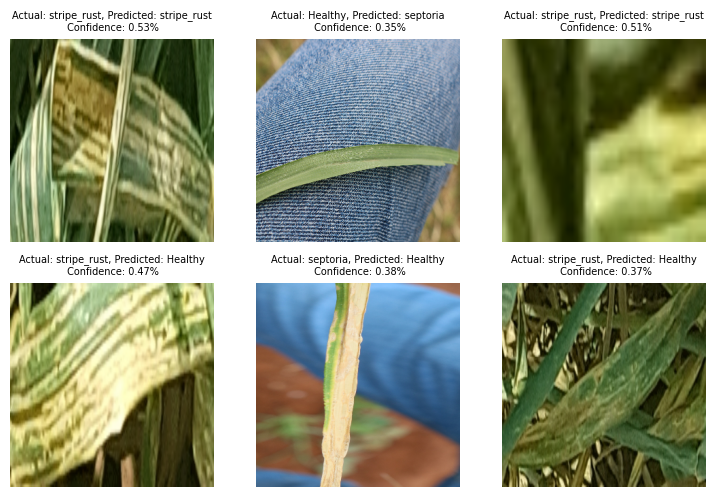

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset from directory
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/wheat_leaf/',  # Ganti dengan path direktori dataset yang benar
    image_size=(300, 300),  # Sesuaikan dengan ukuran gambar yang diinginkan
    batch_size=32
)

# Mendapatkan nama kelas
class_names = test_ds.class_names

# Fungsi untuk melakukan prediksi
def predict(model, image):
    image = tf.expand_dims(image, axis=0)
    predictions = model.predict(image)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]).numpy()
    return predicted_class, confidence

# Menampilkan gambar dengan prediksi
plt.figure(figsize=(9, 9))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}\n Confidence: {confidence:.2f}%", fontsize=7)
        plt.axis("off")
plt.show()